In [141]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [142]:
df = pd.read_csv('../../data/ntn_result_aggregated.csv')

In [143]:
def GetUncertaintyLabels(matrix_ntn_subjects):
    '''Helper function for generating confusion matrix labels'''
    labels = []
    nrows, ncols = matrix_ntn_subjects.shape
    for i in range(0,nrows):
        col_sum = matrix_ntn_subjects.iloc[:,i].sum()
        for k in range(0,ncols):
            val = matrix_ntn_subjects.iloc[k,i]
            n_val = (val/col_sum.astype(float))*100
            val_percent_round = "%.1f" % n_val
            lab_n = '%.1f%%'%n_val
            lab_v = '%d/%d'%(val,col_sum)
            lab='%.1f%%\n%d/%d' % (n_val, val, col_sum)
            labelc= str(lab_n)+"\n"+str(lab_v)
            label = f"{str(lab_n)} {str(lab_v)}"
            labels.append(str(lab))
    labels_array = np.asarray(labels)
    labels_val = labels_array.reshape(5,5)
    labels_new = labels_val.T
    return labels_new


In [144]:
new_class = []

qbg = list(df['bg_charge'])
qsig = list(df['signal_charge'])

for i, q in enumerate(qbg):
    if q > qsig[i]:
        new_class.append(df['corsika_label'][i])
    else:
        new_class.append(df['truth_classification'][i])

print(len(new_class))

4271


In [145]:
df.insert(0, 'classif', new_class)

dnn_accuracy_pre = len(df[df['truth_classification'] == df['dnn_classification']])/4271
user_accuracy_pre = len(df[df['truth_classification'] == df['user_classification']])/4271

print('User-MC composite agreement, pre fix: {}'.format(user_accuracy_pre))
print('DNN-MC composite agreement, pre fix: {}'.format(dnn_accuracy_pre))

dnn_accuracy_post = len(df[df['classif'] == df['dnn_classification']])/4271
user_accuracy_post = len(df[df['classif'] == df['user_classification']])/4271

print('User-MC composite agreement, post fix: {}'.format(user_accuracy_post))
print('DNN-MC composite agreement, post fix: {}'.format(dnn_accuracy_post))

User-MC composite agreement, pre fix: 0.44954343245141654
DNN-MC composite agreement, pre fix: 0.6839147740575977
User-MC composite agreement, post fix: 0.580660266916413
DNN-MC composite agreement, post fix: 0.8192460782018263


In [146]:
types = ['Skimming','Cascade','Through-Going\nTrack','Starting\nTrack','Stopping\nTrack'] #labels


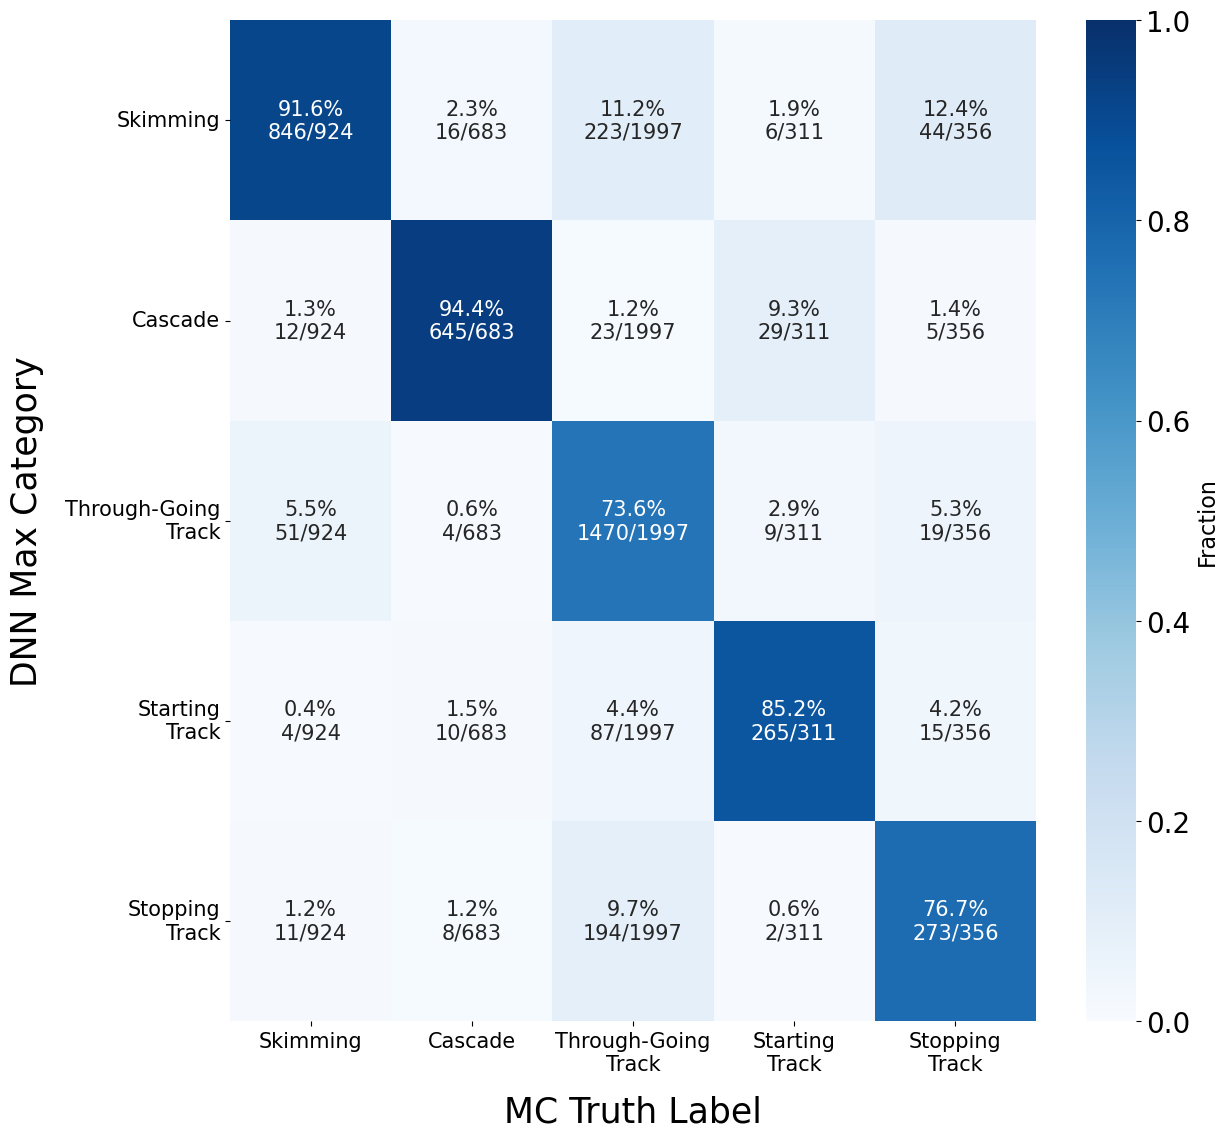

In [147]:
conf_norm = pd.crosstab(df['dnn_classification'], df['classif'], rownames=['DNN Max Category'], colnames=['MC Truth Label'], margins=False,normalize='columns')
#confusion_matrix_user_ml_55_norm_20ret = confusion_matrix_user_ml_55_norm
conf = pd.crosstab(df['dnn_classification'], df['classif'], rownames=['DNN Max Category'], colnames=['MC Truth Label'], margins=False)
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(conf_norm, annot=GetUncertaintyLabels(conf), annot_kws={"size": 15}, fmt='',cmap='Blues',xticklabels=types,yticklabels=types,vmin=0.0,vmax=1.0,cbar_kws={'label':'Fraction'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('Fraction',fontsize=16)
#plt.show()
plt.ylabel('DNN Max Category',fontsize=25,labelpad=15)
plt.xlabel('MC Truth Label',fontsize=25,labelpad=15)
plt.yticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15", va="center")
plt.xticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15")
#plt.savefig("ml_user_cm_cut.png")
#plt.title('DNN vs. MC, Qratio < {}'.format(thres))
plt.show()

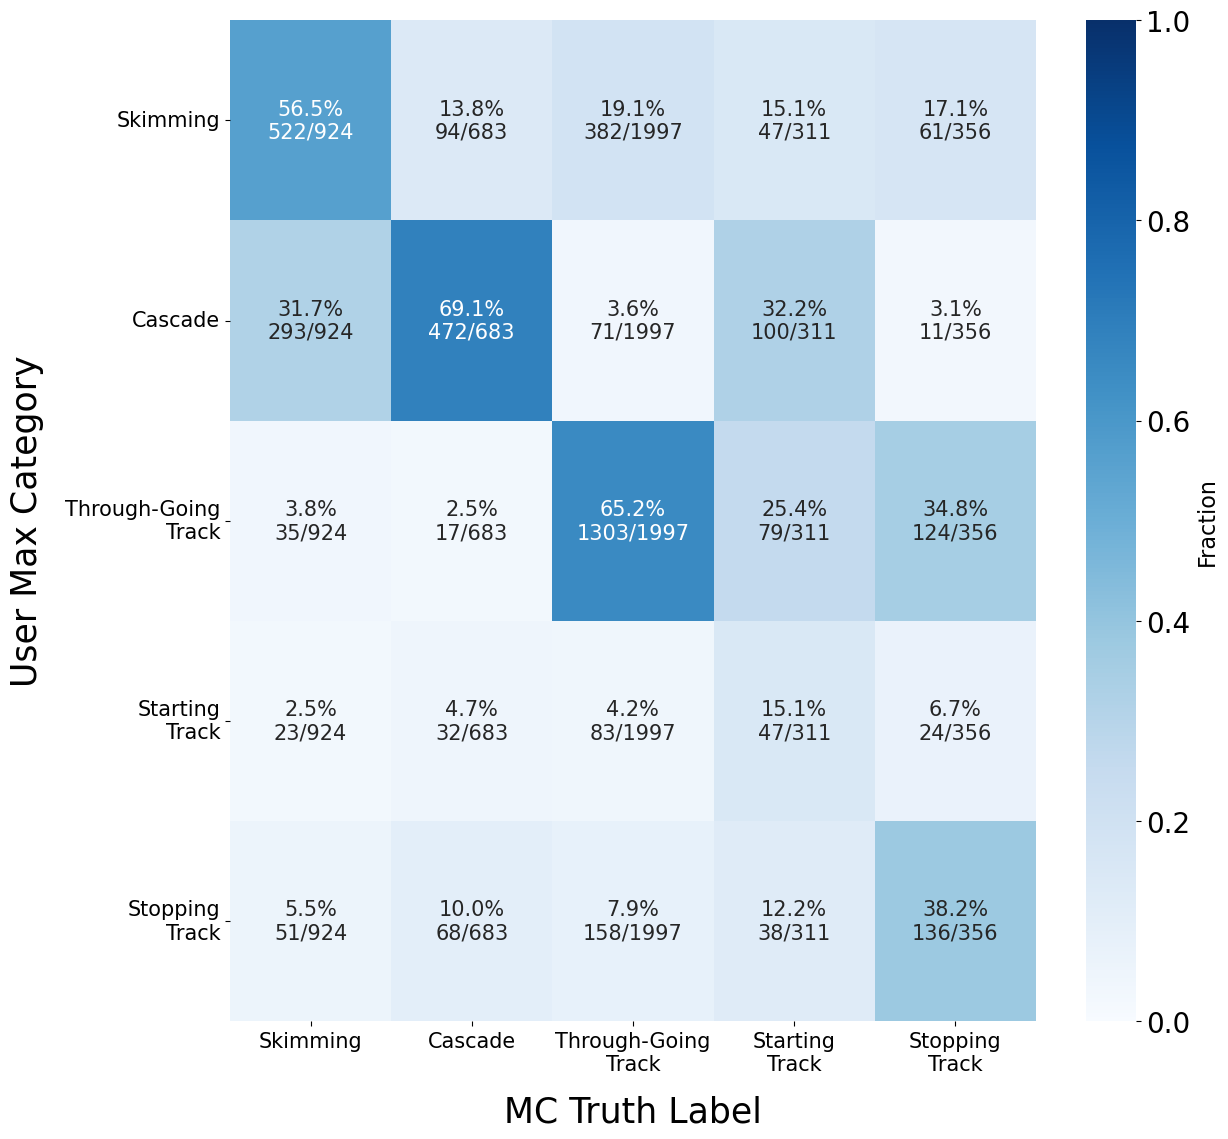

In [148]:
conf_norm = pd.crosstab(df['user_classification'], df['classif'], rownames=['User Max Category'], colnames=['MC Truth Label'], margins=False,normalize='columns')
#confusion_matrix_user_ml_55_norm_20ret = confusion_matrix_user_ml_55_norm
conf = pd.crosstab(df['user_classification'], df['classif'], rownames=['User Max Category'], colnames=['MC Truth Label'], margins=False)
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(conf_norm, annot=GetUncertaintyLabels(conf), annot_kws={"size": 15}, fmt='',cmap='Blues',xticklabels=types,yticklabels=types,vmin=0.0,vmax=1.0,cbar_kws={'label':'Fraction'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('Fraction',fontsize=16)
#plt.show()
plt.ylabel('User Max Category',fontsize=25,labelpad=15)
plt.xlabel('MC Truth Label',fontsize=25,labelpad=15)
plt.yticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15", va="center")
plt.xticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15")
#plt.savefig("ml_user_cm_cut.png")
#plt.title('DNN vs. MC, Qratio < {}'.format(thres))
plt.show()

## 55% cut on the users now

In [149]:
df = df[df['user agreement'] >= 0.55]

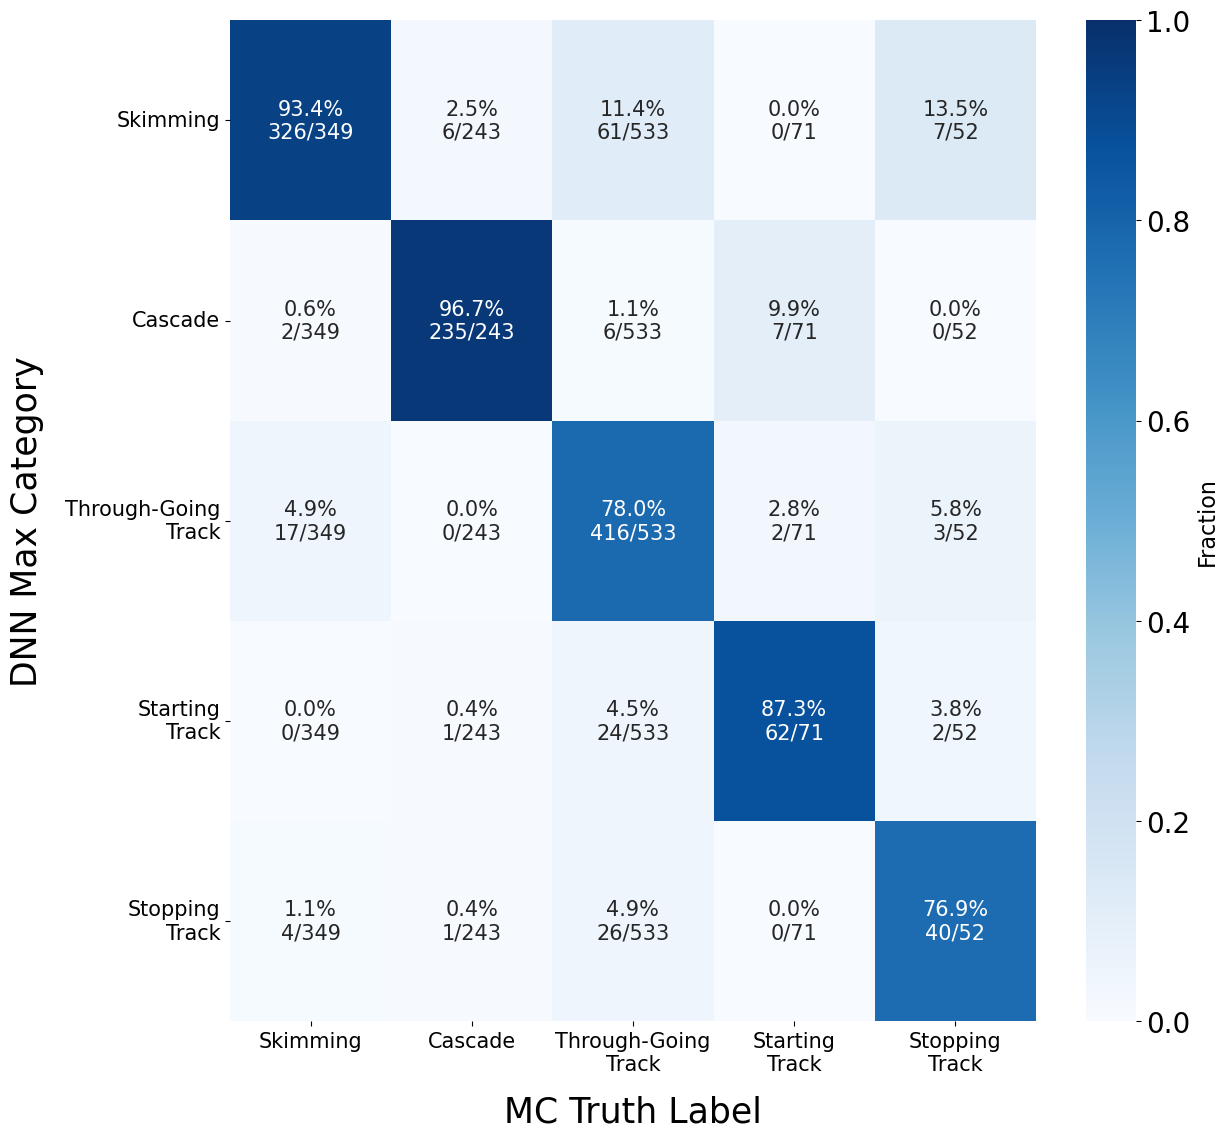

In [150]:
conf_norm = pd.crosstab(df['dnn_classification'], df['classif'], rownames=['DNN Max Category'], colnames=['MC Truth Label'], margins=False,normalize='columns')
#confusion_matrix_user_ml_55_norm_20ret = confusion_matrix_user_ml_55_norm
conf = pd.crosstab(df['dnn_classification'], df['classif'], rownames=['DNN Max Category'], colnames=['MC Truth Label'], margins=False)
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(conf_norm, annot=GetUncertaintyLabels(conf), annot_kws={"size": 15}, fmt='',cmap='Blues',xticklabels=types,yticklabels=types,vmin=0.0,vmax=1.0,cbar_kws={'label':'Fraction'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('Fraction',fontsize=16)
#plt.show()
plt.ylabel('DNN Max Category',fontsize=25,labelpad=15)
plt.xlabel('MC Truth Label',fontsize=25,labelpad=15)
plt.yticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15", va="center")
plt.xticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15")
#plt.savefig("ml_user_cm_cut.png")
#plt.title('DNN vs. MC, Qratio < {}'.format(thres))
plt.show()

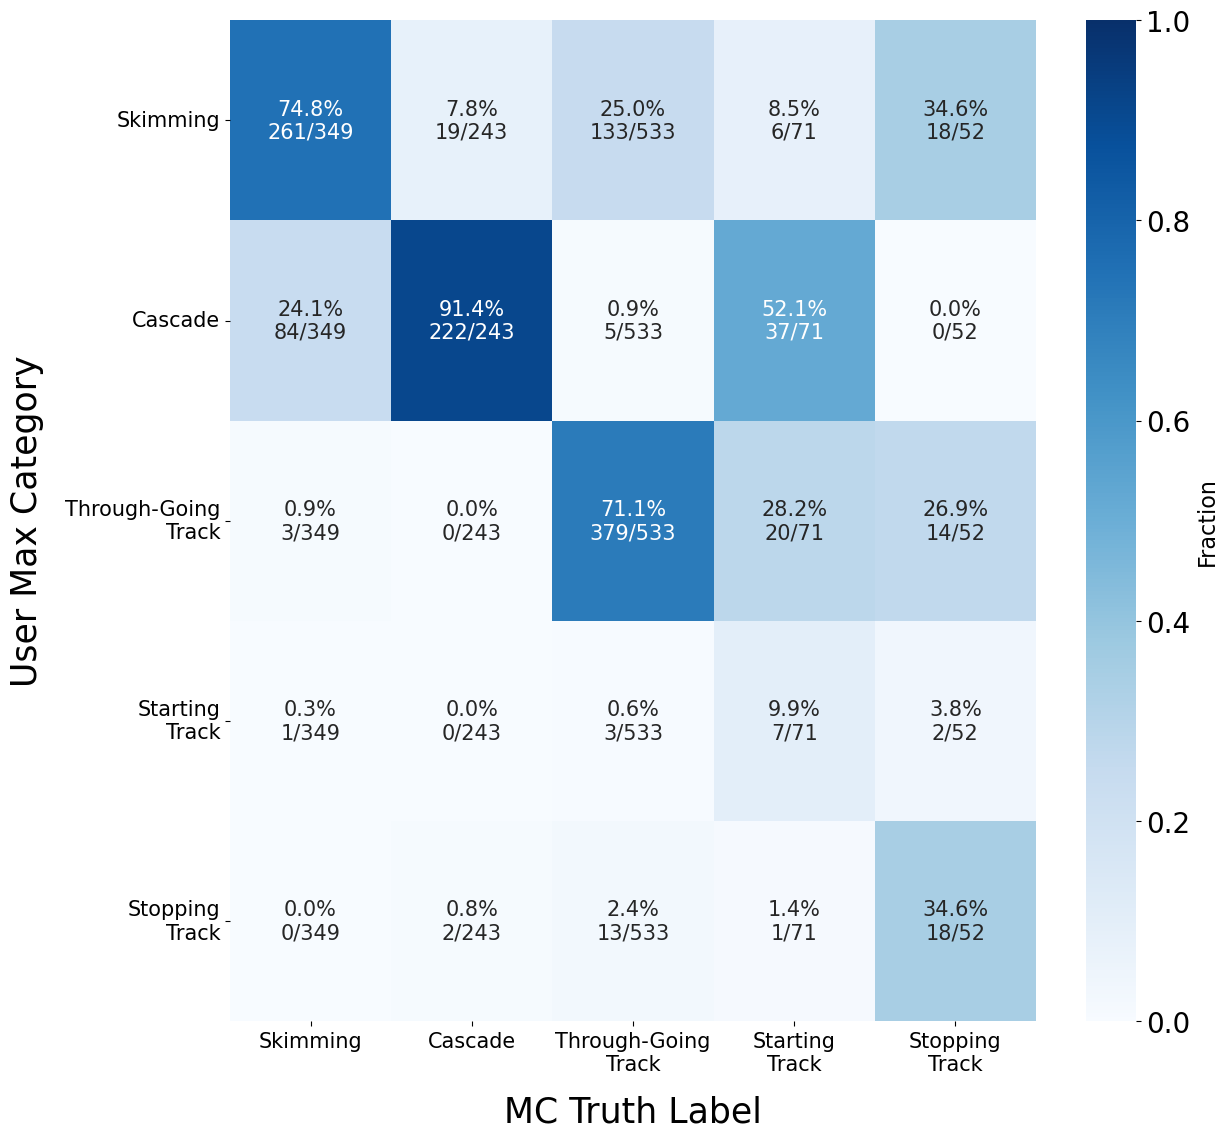

In [151]:
conf_norm = pd.crosstab(df['user_classification'], df['classif'], rownames=['User Max Category'], colnames=['MC Truth Label'], margins=False,normalize='columns')
#confusion_matrix_user_ml_55_norm_20ret = confusion_matrix_user_ml_55_norm
conf = pd.crosstab(df['user_classification'], df['classif'], rownames=['User Max Category'], colnames=['MC Truth Label'], margins=False)
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(conf_norm, annot=GetUncertaintyLabels(conf), annot_kws={"size": 15}, fmt='',cmap='Blues',xticklabels=types,yticklabels=types,vmin=0.0,vmax=1.0,cbar_kws={'label':'Fraction'})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('Fraction',fontsize=16)
#plt.show()
plt.ylabel('User Max Category',fontsize=25,labelpad=15)
plt.xlabel('MC Truth Label',fontsize=25,labelpad=15)
plt.yticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15", va="center")
plt.xticks(np.arange(5)+0.5,types,
           rotation=0, fontsize="15")
#plt.savefig("ml_user_cm_cut.png")
#plt.title('DNN vs. MC, Qratio < {}'.format(thres))
plt.show()